# Modelo de regresión lineal múltiple


El modelo de regresión lineal múltiple con ( p ) variables predictoras y basado en ( n ) observaciones tomadas es de la forma:

$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + e_i \quad \text{para } i=1,2,\ldots,n.$

Escribiendo el modelo para cada una de las observaciones, éste puede ser considerado como un sistema de ecuaciones lineales de la forma:


$$\begin{aligned}
y_1 &= \beta_0 + \beta_1 x_{11} + \beta_2 x_{12} + \ldots + \beta_p x_{1p} + e_1 \\
y_2 &= \beta_0 + \beta_1 x_{21} + \beta_2 x_{22} + \ldots + \beta_p x_{2p} + e_2 \\
&\vdots \\
y_n &= \beta_0 + \beta_1 x_{n1} + \beta_2 x_{n2} + \ldots + \beta_p x_{np} + e_n \\
\end{aligned}$$

que puede ser escrita en forma matricial como

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_n \\
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & x_{12} & \ldots & x_{1p} \\
1 & x_{21} & x_{22} & \ldots & x_{2p} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{n1} & x_{n2} & \ldots & x_{np} \\
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_p \\
\end{bmatrix}
+
\begin{bmatrix}
e_1 \\
e_2 \\
\vdots \\
e_n \\
\end{bmatrix}
$$

O sea,
$$Y = X\beta + e \quad (2.2)$$

donde $Y$ es un vector columna $n$-dimensional, $X$ es una matriz $n \times p'$, con $p' = p+1$, $\beta$ es el vector de coeficientes de regresión a ser estimados, su dimensión es $p'$ y $e$ es un vector columna aleatorio de dimensión $n$.

Por ahora, las únicas suposiciones que se requieren son que $E(e) = 0$ y que la matriz de varianza-covarianza de los errores está dada por $\text{Var}(e) = \sigma^2 I_n$, donde $I_n$ es la matriz identidad de orden $n$.



## Inferencia sobre la regresión lineal múltiple


En esta sección se harán  pruebas de hipótesis e intervalos de confianza acerca de los coeficientes del modelo de regresión poblacional. 

#### Prueba de hipótesis acerca de un coeficiente de regresión individual 

En este caso la hipótesis nula más importante es $Ho: β_i=0 ( i=1,2..,p)$, o sea la variable $X_i$  no es 
importante en el modelo, versus la hipótesis alterna $Ha:β_i≠0$; la variable $X_i$ si merece ser 
considerada en el modelo. La prueba estadística es la prueba de t, definida por:

$$ t =  \frac{\hat{\beta_i}}{se(\hat{\beta_i})} = \frac{\hat{\beta_i}}{s\sqrt{C_{ii}}} $$

 donde el error estándar de $\hat{\beta_i} $ se calcula por $se(\hat{\beta_i})= s\sqrt{C_{ii}}$ , $Cii$ es el $i-ésimo$ elemento de la 
diagonal de $(X'X)^{-1}$. Esta $t$ se distribuye como una T-Student con $n-p-1$ grados de libertad. 


#### Prueba de Hipótesis de que todos los coeficientes de regresión son ceros

En este caso la hipótesis nula es  $Ho: β_1=β_2=…=β_p=0$, o sea que el modelo no sirve, versus la hipótesis alterna $Ha$: Al menos uno de los coeficientes es distinto de cero, o sea al menos una de las variables del modelo puede ser usada para explicar la variación de $Y$.  
La suma de cuadrados de Regresión tiene p grados de libertad  que es igual al número de variables predictoras en el modelo. 
Se puede mostrar que  si la hipótesis nula es cierta entonces :                                   
$$F=\frac{\frac{SSR}{p}}{\frac{SSE}{n-p-1}}$$
se distribuye como una $F$ con $p$ grados de libertad en el numerador y $n-p-1$ grados de libertad en el denominador. 


#### Ejemplo de aplicación 

La base de datos e.xlsx contiene las siguientes variables medidas en 146 carros: 

| Variable | Descripción |
|----------|----------|
| weight   |Peso en libras  | 
| eng.cc   |  Cilindrada del motor en pulgadas cúbicas |
| hp   | Potencia del motor en caballos de fuerza (hp) |
|hw.mpg |Eficiencia en consumo de combustible en carretera en millas por galón (mpg)|

Se desea estimar la eficiencia en consumo de combustible en carretera a partir de las demás variables

In [7]:
#Si estas revizando los archivos desde tu pc puedes abrirlo con el comando os.getcwd()
import pandas as pd
import os
os.getcwd()
#agregas al final de la ubicación \\e.xlsx y con esto tendras la ubicación exacta para leer el archivo excel.

'C:\\Users\\Manolo\\Desktop\\parcial\\Parcial-LP2'

In [1]:
#paquetes a utilizar.
import statsmodels.api as sm
import pandas as pd
import numpy as np
import openpyxl as opxl
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\Manolo\Desktop\parcial\Parcial-LP2\\e.xlsx")


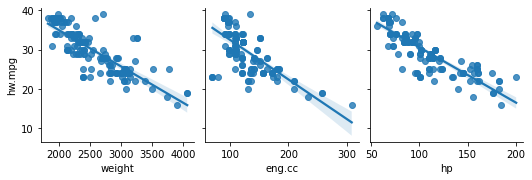

In [8]:

# Visualizar la relación entre cada variable predictora y la variable respuesta.
sns.pairplot(df, x_vars=["weight", "eng.cc", "hp"], y_vars="hw.mpg", kind="reg")
plt.show()


In [2]:
df

,weight,eng.cc,hp,hw.mpg
0,2823,152,154,26
1,2337,109,102,30
2,2824,136,115,22
3,2507,136,110,25
4,2844,136,110,25
...,...,...,...,...
141,2952,141,114,28
142,3049,141,160,25
143,3012,173,134,23
144,3217,145,106,27


In [3]:
# Definimos las variables predictoras X y la respuesta Y:
X = df[["weight", "eng.cc", "hp"]]
Y = df["hw.mpg"]

def reg_m(y, x):
    # Agrega una constante (intercepto) al modelo:
    x = sm.add_constant(x)
    # Ajuste del modelo: 
    model = sm.OLS(y, x).fit()
    return model

# Resumen de estadísticas: 
print(reg_m(Y, X).summary())

                            OLS Regression Results                            
Dep. Variable:                 hw.mpg   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     198.4
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.41e-50
Time:                        15:45:23   Log-Likelihood:                -336.70
No. Observations:                 146   AIC:                             681.4
Df Residuals:                     142   BIC:                             693.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7117      1.239     41.749      0.0

#### Interpretaición de los coeficientes de regresión:

$\hat{\beta_0}$ (intercepto) : No tiene interpretación científica. Ya que no tiene sentido en el caso de que un motor que no este operando tenga una alta eficiencia, o que el peso sea cero.

$\hat{\beta_1}$: Si se mantiene las demás variables constantes, y se incrementa el peso en una libra, se espera que la eficiencia disminuya en promedio 0.0066 mpg.

$\hat{\beta_2}$:  Si se mantiene las demás variables constantes, y se incrementa en una pulgada cúbica la cilindrada del motor, se espera que la eficiencia aumente en promedio 0.0495 mpg.

$\hat{\beta_3}$: Si se mantiene las demás variables constantes, y se incrementa la potencia del motor en un caballo de fuerza, se espera que la eficiencia disminuya en promedio 0.1064 mpg.

## Analisís de linealidad con el gráfico de residuales
La linealidad es un supuesto que establece que la variables predictoras deben tener una relación aproximadamente lineal con la variable respuesta.
Para medir el supuesto de linealidad podemos utilizar pruebas de hipotesis como por ejemplo la de no aditividad de Tukey donde si se rechaza la hipótesis nula se puede afirmar que no se cumple con el supuesto de linealidad, una manera más simple es obserbar el gráfico de residuales y los valores estimados, si muestra alguna tendencia que sea fácilmente reconocible no se cumple con el supuesto.


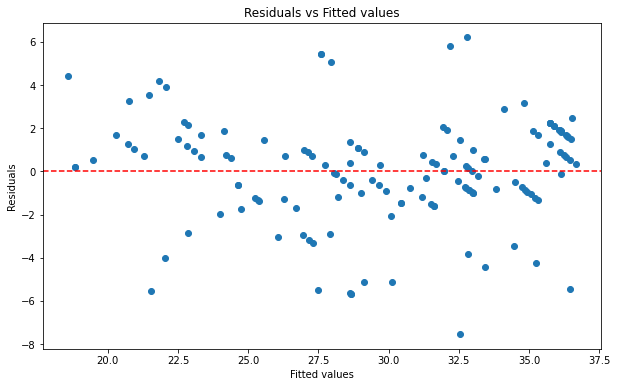

In [16]:

#Obtener los residuos
model = reg_m(Y, X)
residuals = model.resid

# Gráfico de residuos
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted values")
plt.show()

